In [17]:
import os
import pandas as pd
import pickle
import gzip
import numpy as np
import seaborn as sns
import itertools
from IPython.display import Markdown, display
from mpl_toolkits.mplot3d import axes3d, Axes3D
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import matplotlib.pyplot as plt

import src.environment as env
%matplotlib inline

from src.eda import Eda
from src.modeling import Modeling
from src.evaluation import Evaluation

ImportError: cannot import name 'Evaluation' from 'src.evaluation' (/Users/jeschrader/code-port/shallow-algo-data-projects/src/evaluation.py)

In [3]:
eda = Eda('data/users.csv')
eda.print_n_lines(5)

ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS

1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0

545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0

10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0

fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0



In [4]:
eda.set_df()

### Exploratory Data Analysis and Cleaning

Looking at:
Structure: 
  - 

Granularity: 
  - 
Scope:
 - 

Temporality:
 - 

Faithfulness:
 - I'll walk through each field in the next block to examine if the data looks reasonable and if not, how to address it.



### EDA and Faithfulness
We'll look at the User dataset first.

If I don't mention missing values, it will be because there are none and so nothing to address.  The number of missing values will be seen by the following `.info()` call.

In [5]:
eda.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       9944 non-null   object
 1   HAS_EMAIL                9944 non-null   int64 
 2   PHONE_COUNTRY            9944 non-null   object
 3   IS_FRAUDSTER             9944 non-null   bool  
 4   TERMS_VERSION            8417 non-null   object
 5   CREATED_DATE             9944 non-null   object
 6   STATE                    9944 non-null   object
 7   COUNTRY                  9944 non-null   object
 8   BIRTH_YEAR               9944 non-null   int64 
 9   KYC                      9944 non-null   object
 10  FAILED_SIGN_IN_ATTEMPTS  9944 non-null   int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 786.7+ KB


## Explore the distributions of each variable in the Users Table

In [7]:
eda.value_counts(['ID'])

Value counts for 'PHONE_COUNTRY':
PHONE_COUNTRY
GB||JE||IM||GG    4302
FR                1309
PL                 672
LT                 492
ES                 411
                  ... 
CO                   1
GE                   1
OM                   1
AD                   1
CR                   1
Name: count, Length: 83, dtype: int64

Value counts for 'IS_FRAUDSTER':
IS_FRAUDSTER
False    9646
True      298
Name: count, dtype: int64

Value counts for 'TERMS_VERSION':
TERMS_VERSION
2018-05-25    3393
2018-09-20    2109
2018-03-20    2048
2018-01-13     440
2018-01-01     232
2017-01-16     121
2017-02-02      74
Name: count, dtype: int64

Value counts for 'CREATED_DATE':
CREATED_DATE
2017-08-06 07:33:33.341000    1
2018-03-16 14:40:22.272000    1
2018-07-11 19:04:55.634000    1
2018-03-08 18:11:53.408000    1
2016-09-29 18:06:48.830000    1
                             ..
2016-05-06 12:53:19.909000    1
2018-04-27 05:10:31.563000    1
2018-07-01 17:54:56.665000    1
2017-08-14 12:21:

### Notes on data distributions dump
  - 

Notes: Created_Date

This will be transformed into a date time.  The value does have both a date and a time.  I'll split it into two fields.  It is possible that there is some relevant information in the time at which the account was created.

In [14]:
eda.transform_dates(['CREATED_DATE'])

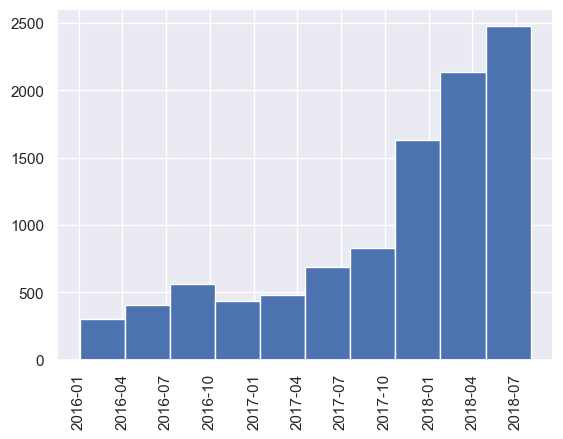

In [16]:
plt.hist(eda.df['DT_CREATED_DATE'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.show()


### Handle Missing Values in Nominal Variables

In [24]:
eda.fill_nominal_missing(['TERMS_VERSION'])

## Relationships Between Factors and Target Variable

/Users/jeschrader/miniconda3/envs/sci-py-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


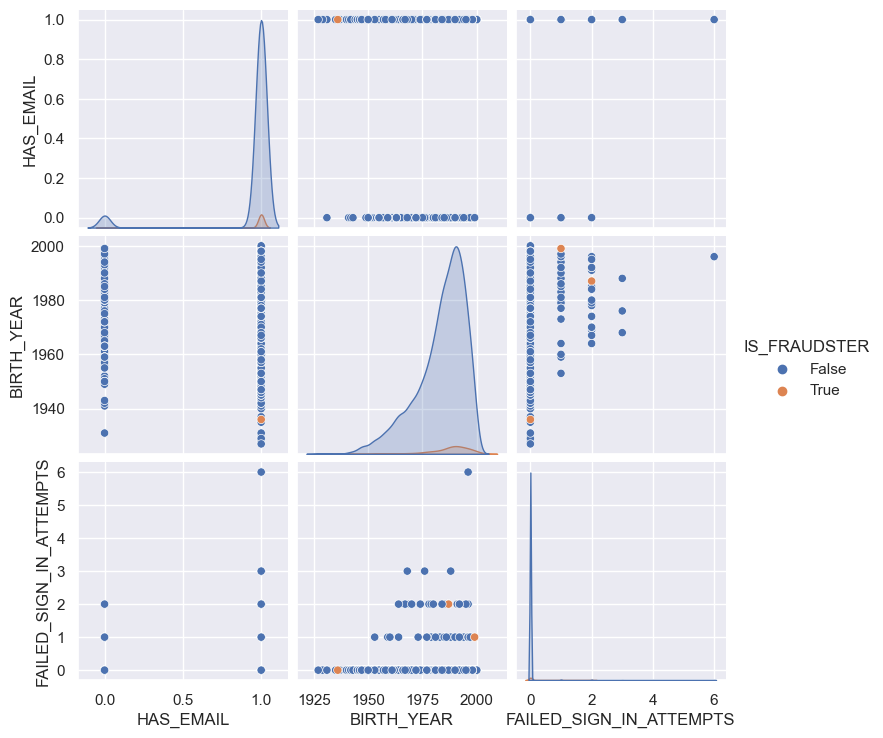

In [18]:
# This will just handle numeric variables
sns.pairplot(eda.df, hue='IS_FRAUDSTER')

In [20]:
eda.pivot_tables('IS_FRAUDSTER', 'ID', ['ID', 'IS_FRAUDSTER', 'CREATED_DATE', 'DT_CREATED_DATETIME', 'DT_CREATED_TIME'])

Pivot for 'HAS_EMAIL' against 'IS_FRAUDSTER'
HAS_EMAIL       0     1
IS_FRAUDSTER           
False         529  9117
True            1   297

Pivot for 'PHONE_COUNTRY' against 'IS_FRAUDSTER'
PHONE_COUNTRY   AD   AE   AL   AR    AT   AZ    BE    BG  BL||MF||GP   BN  \
IS_FRAUDSTER                                                                
False          1.0  3.0  2.0  4.0  30.0  1.0  86.0  61.0         3.0  1.0   
True           NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN         NaN  NaN   

PHONE_COUNTRY  ...    SK   SN  TF||RE||YT    TH   TR   TW   UA  US||PR||CA  \
IS_FRAUDSTER   ...                                                           
False          ...  22.0  1.0         3.0  10.0  5.0  1.0  4.0        18.0   
True           ...   NaN  NaN         NaN   NaN  NaN  NaN  NaN         2.0   

PHONE_COUNTRY   VN   ZA  
IS_FRAUDSTER             
False          2.0  6.0  
True           NaN  NaN  

[2 rows x 83 columns]

Pivot for 'TERMS_VERSION' against 'IS_FRAUDSTER'
TERMS_VERS

### Notes on relationships between factors and target in users table
- STATE: This variable where Locked=True is 100% aligned.  Presumably, this means they've already detected this user was a fraudster.  We can use this variable and be done.  But, that is too easy.
- HAS_EMAIL: correlated

## Feature Engineering and Modeling

In [50]:
modeling = Modeling(eda.df, 'IS_FRAUDSTER') 

### One-Hot Encode Non-Numeric Categorical Variables

In [52]:
modeling.one_hot_encode()

In [53]:
X_corr = modeling.X.corr().abs()
X_corr.head()

,HAS_EMAIL,BIRTH_YEAR,FAILED_SIGN_IN_ATTEMPTS,PHONE_COUNTRY_AE,PHONE_COUNTRY_AL,PHONE_COUNTRY_AR,PHONE_COUNTRY_AT,PHONE_COUNTRY_AZ,PHONE_COUNTRY_BE,PHONE_COUNTRY_BG,...,COUNTRY_PT,COUNTRY_RE,COUNTRY_RO,COUNTRY_RU,COUNTRY_SE,COUNTRY_SI,COUNTRY_SK,KYC_NONE,KYC_PASSED,KYC_PENDING
HAS_EMAIL,1.000000,0.004763,0.016344,0.004122,0.003365,0.004760,0.003274,0.002380,0.016518,0.018641,...,0.009692,0.004122,0.032646,0.021657,0.003231,0.005622,0.011424,0.309316,0.294716,0.010127
BIRTH_YEAR,0.004763,1.000000,0.004662,0.003398,0.010555,0.008048,0.008466,0.000395,0.011252,0.003206,...,0.012215,0.019051,0.007245,0.016153,0.000647,0.004010,0.004929,0.031923,0.022348,0.000315
FAILED_SIGN_IN_ATTEMPTS,0.016344,0.004662,1.000000,0.001077,0.000880,0.001244,0.003411,0.000622,0.005792,0.004872,...,0.005603,0.001077,0.011753,0.001077,0.004274,0.004625,0.002986,0.012594,0.011739,0.005370
PHONE_COUNTRY_AE,0.004122,0.003398,0.001077,1.000000,0.000246,0.000348,0.000956,0.000174,0.001623,0.001365,...,0.002091,0.000302,0.002613,0.000302,0.001197,0.001296,0.000836,0.010420,0.011350,0.001504
PHONE_COUNTRY_AL,0.003365,0.010555,0.000880,0.000246,1.000000,0.000285,0.000780,0.000142,0.001325,0.001114,...,0.001707,0.000246,0.002133,0.000246,0.000977,0.001058,0.000683,0.007570,0.006221,0.001228


<Axes: >

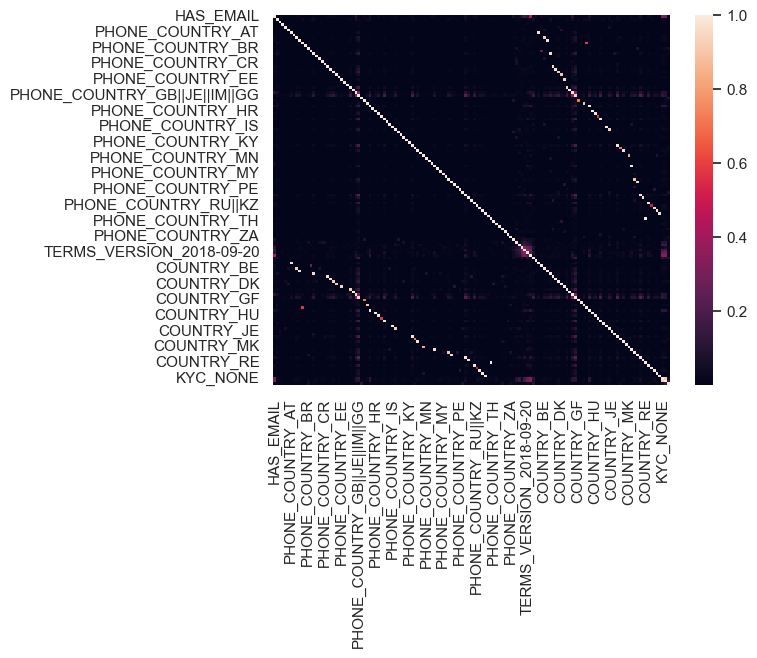

In [54]:
sns.heatmap(X_corr)

In [56]:
# https://h1ros.github.io/posts/drop-highly-correlated-features/
import numpy as np
threshold = 0.9

columns = np.full((X_corr.shape[0],), True, dtype=bool)
for i in range(X_corr.shape[0]):
    for j in range(i+1, X_corr.shape[0]):
        if X_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = modeling.X.columns[columns]
selected_columns

modeling.X = modeling.X[selected_columns]

In [57]:
modeling.set_train_test_split()

In [60]:
modeling.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HAS_EMAIL                9944 non-null   int64 
 1   PHONE_COUNTRY            9944 non-null   object
 2   IS_FRAUDSTER             9944 non-null   bool  
 3   TERMS_VERSION            9944 non-null   object
 4   STATE                    9944 non-null   object
 5   COUNTRY                  9944 non-null   object
 6   BIRTH_YEAR               9944 non-null   int64 
 7   KYC                      9944 non-null   object
 8   FAILED_SIGN_IN_ATTEMPTS  9944 non-null   int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 631.3+ KB


In [62]:
modeling.scale_attributes(columns=['FAILED_SIGN_IN_ATTEMPTS', 'BIRTH_YEAR'])

## Modeling
Below, we'll try multiple models.


### Models
1. LogisticRegression
  - LogisticRegression class
    - 
  - LogisticRegressionCV class
    - 
2. Decision Tree
  - 
3. Random Forest
  - 

### Evaluation
1. sci-kit `accuracy_score`
  - Number of correctly labelled items over total items
  - This score's issue in this dataset particularly is that we get 98% and yet only identify 50% of the fraudulent transactions.  This is because the vast majority of the transactions are not fraudulent and by skewing toward false negatives, our score is high.
2. F1 score
  - The F1 score(and its component scores) from our first modeling runs show that we have not been very successful and need to iterate.


### Final Notes
The RandomForestClassifier is the best for this case but still could be better.